In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

In [2]:
env = Maze()

D:\A\envs\tensorflow\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


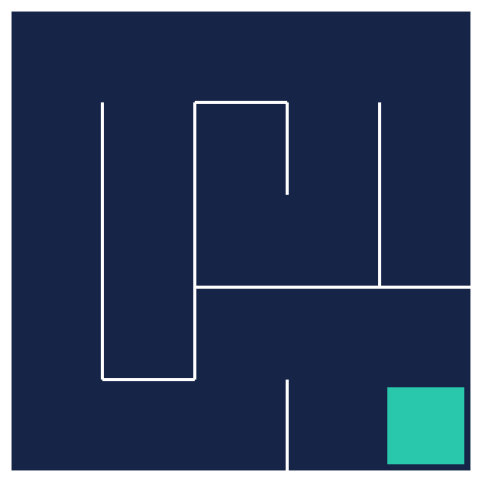

In [3]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

In [4]:
env.close()

In [5]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


In [6]:
policy_probs = np.full((5,5,4),0.25)

In [7]:
def policy(state):
    return policy_probs[state]

In [8]:
action_proabilities = policy((0,0))
for action, prob in zip(range(4), action_proabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


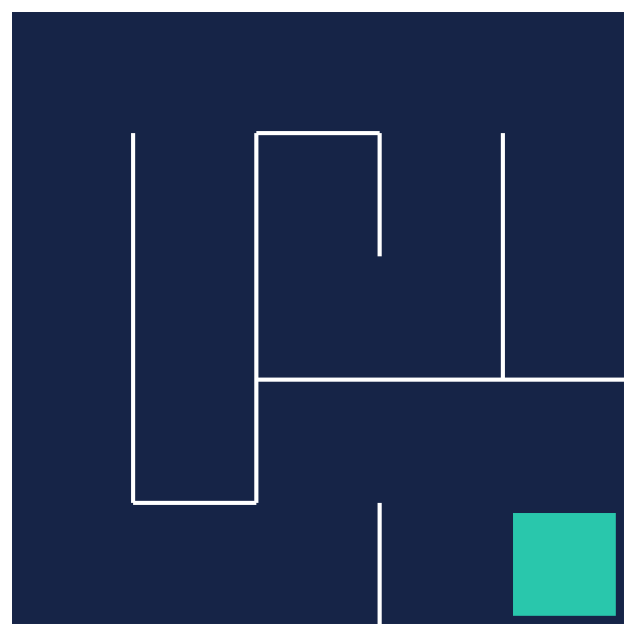

In [9]:
test_agent(env,policy,episodes=1)

In [10]:
env.close()

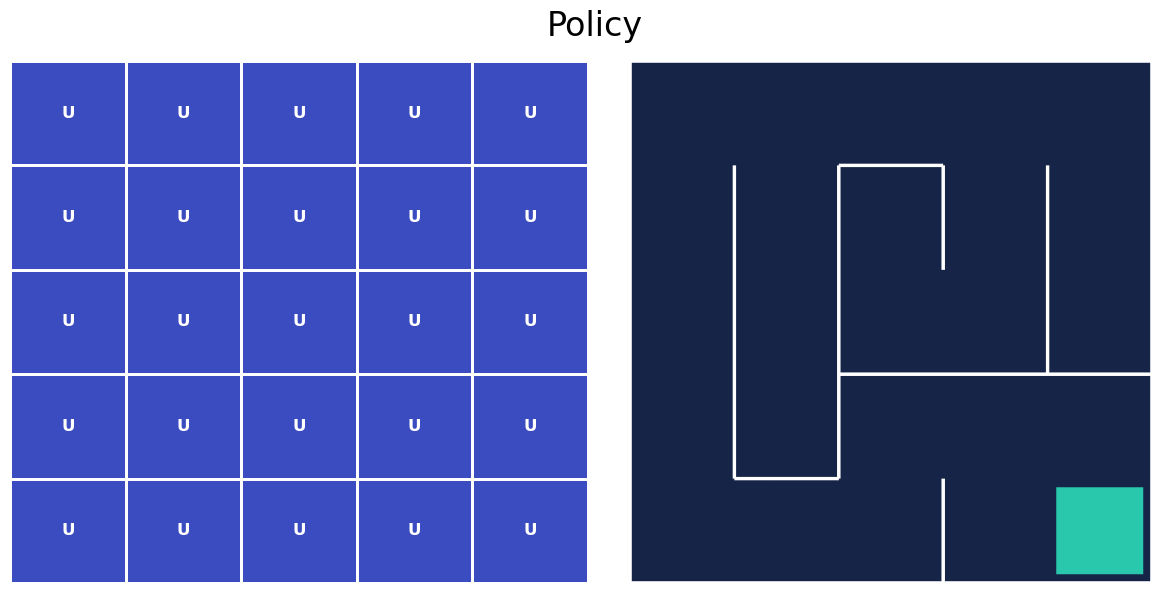

In [11]:
plot_policy(policy_probs,frame)

In [12]:
state_values = np.zeros(shape=(5,5))

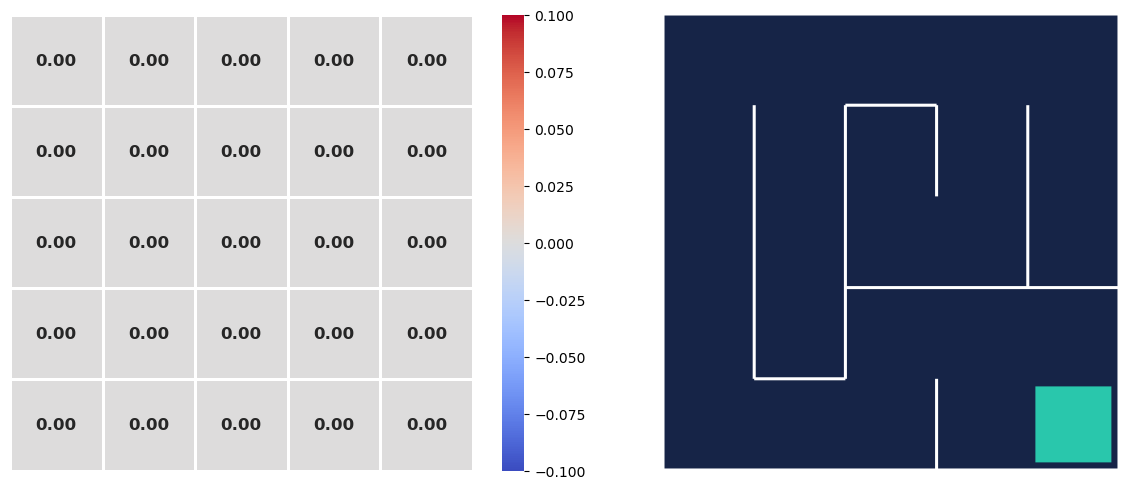

In [13]:
plot_values(state_values, frame)

In [14]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    
    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                action_probs = None
                max_qsa = float("-inf")
                
                for action in range(4):
                    next_state, reward, _,_ = env.simulate_step((row,col), action)
                    qsa = reward + gamma * state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.
                
                state_values[(row,col)] = max_qsa
                policy_probs[(row,col)] = action_probs
                
                delta = max(delta, abs(max_qsa - old_value))

In [15]:
value_iteration(policy_probs, state_values)

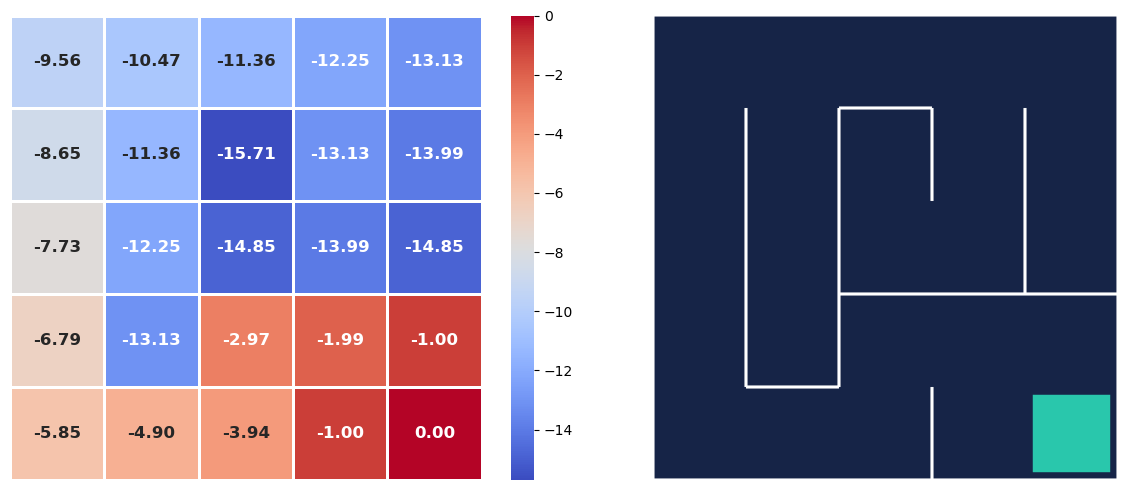

In [16]:
plot_values(state_values, frame)

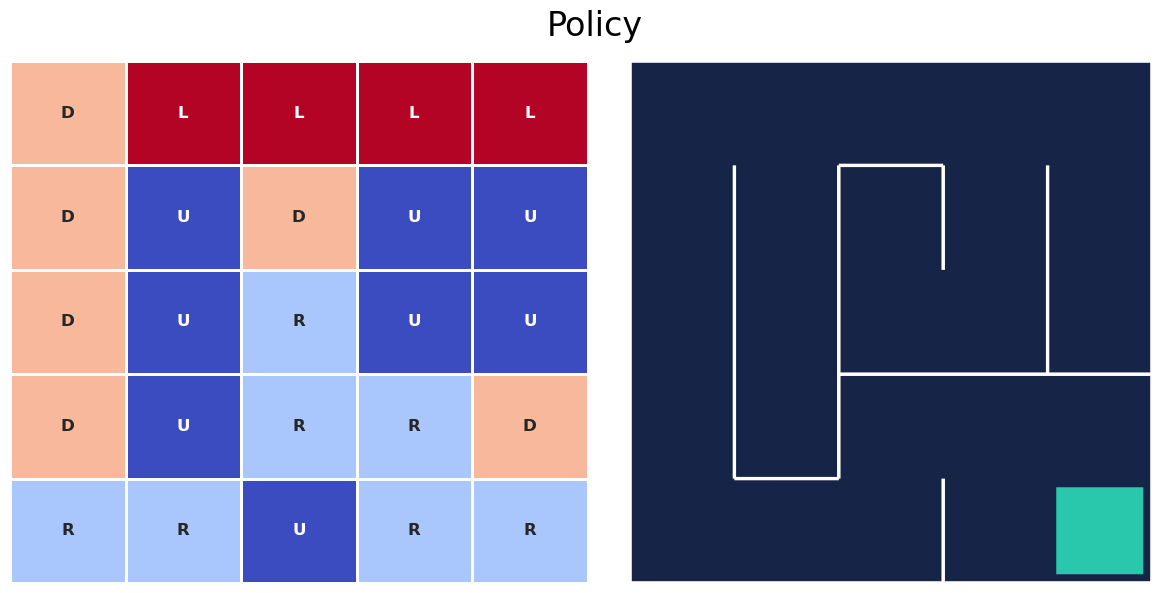

In [17]:
plot_policy(policy_probs, frame)

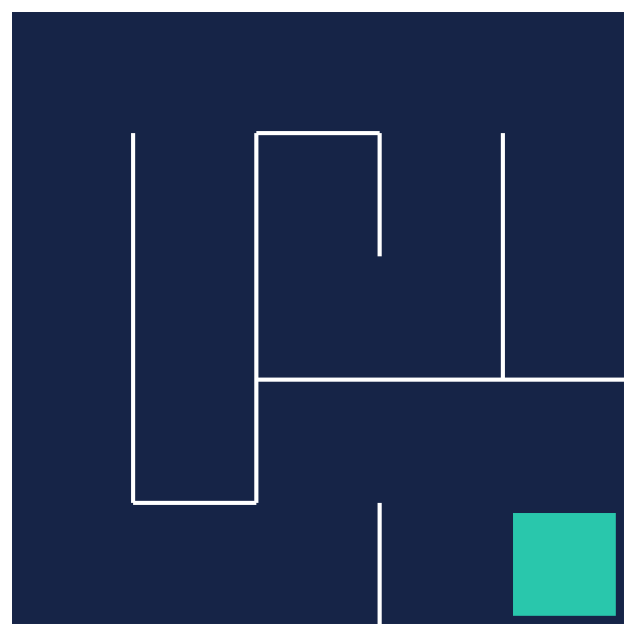

In [18]:
test_agent(env, policy)

In [19]:
env.close()